# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent = 4, sort_keys = True))


{
    "data": {
        "1": {
            "circulating_supply": 19381912,
            "id": 1,
            "last_updated": 1684884562,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 527147470717,
                    "percent_change_1h": 0.100623776948384,
                    "percent_change_24h": 1.45247265818803,
                    "percent_change_7d": 0.958076909173359,
                    "percentage_change_1h": 0.100623776948384,
                    "percentage_change_24h": 1.45247265818803,
                    "percentage_change_7d": 0.958076909173359,
                    "price": 27247.0,
                    "volume_24h": 14270284123
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19381912,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent = 4, sort_keys = True))


{
    "data": {
        "1027": {
            "circulating_supply": 120266407,
            "id": 1027,
            "last_updated": 1684884556,
            "max_supply": 120266407,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 222867415523,
                    "percent_change_1h": 0.196704703814424,
                    "percent_change_24h": 2.07498060033233,
                    "percent_change_7d": 1.7512870303997,
                    "percentage_change_1h": 0.196704703814424,
                    "percentage_change_24h": 2.07498060033233,
                    "percentage_change_7d": 1.7512870303997,
                    "price": 1856.03,
                    "volume_24h": 7627039510
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120266407,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"Bitcoin's current price is ${btc_price:.02f}")


Bitcoin's current price is $27247.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]


# Print the current price of ETH
print(f"Ethereum's current price is ${eth_price:.02f}") 


Ethereum's current price is $1856.03


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"The current value of my holding in Bitcoin is ${btc_value:.02f}")


The current value of my holding in Bitcoin is $32696.40


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"The current value of my holding in Ethereum is ${eth_value:.02f}")


The current value of my holding in Ethereum is $9836.96


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
print(f"My crypto wallet is currently worth ${total_crypto_wallet:.02f}")


My crypto wallet is currently worth $42533.36


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [15]:
# Create the Alpaca tradeapi.REST object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AGG", "SPY"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
bond_stock_value = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = bond_stock_value[bond_stock_value['symbol']=='AGG'].drop('symbol', axis = 1)
SPY = bond_stock_value[bond_stock_value['symbol']=='SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
bond_stock_value = pd.concat([SPY, AGG], axis = 1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
bond_stock_value.head()


SPY                                    
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.28  334.88  332.3  334.57  57282821  \

                                                      AGG                    
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395  \

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = bond_stock_value["AGG"]["close"]

# Print the AGG closing price
print(f"AGG's closing price is ${int(agg_close_price[0])}")

AGG's closing price is $119


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = bond_stock_value["SPY"]["close"]

# Print the SPY closing price
print(f"SPY's closing price is ${int(spy_close_price[0])}")


SPY's closing price is $334


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"AGG's current bond portfolio value is ${int(agg_value.iloc[0])}")


AGG's current bond portfolio value is $23886


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"SPY's current bond portfolio value is ${int(spy_value[0])}")


SPY's current bond portfolio value is $36802


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = int(agg_value[0]) + int(spy_value[0])

# Print the current balance of the stock and bond portion of the portfolio
# print(f"The current balance of the stock and bond portion is ${int(total_stocks_bonds.)}")


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"The current balance of the cryptocurreny wallet is ${int(total_portfolio)}")


The current balance of the cryptocurreny wallet is $103221


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[42533.359, 60688]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns = ['amount'],
    index = ["crypto", "bond/stock"]
)

# Display the savings_df DataFrame
savings_df


,amount
crypto,42533.359
bond/stock,60688.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<Axes: title={'center': "Composition of the Member's Portfolio"}, ylabel='amount'>

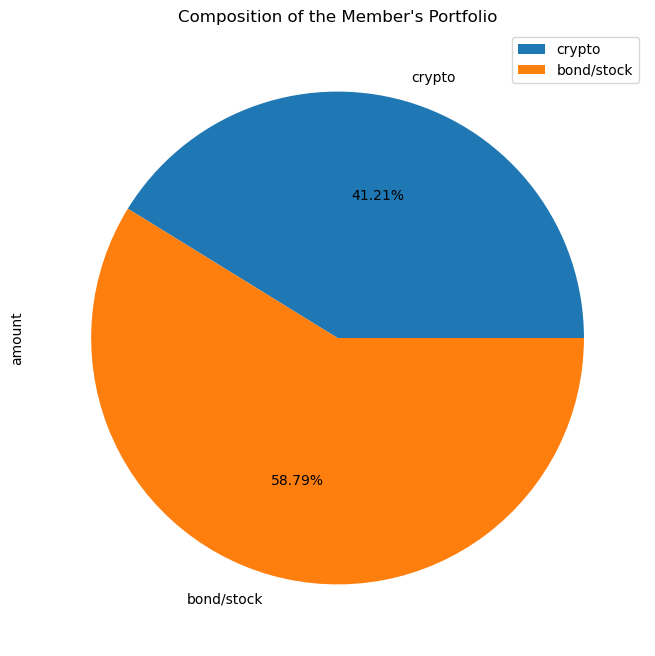

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(figsize = (12,8), y = "amount", autopct = "%.2f%%", shadow = False, title = "Composition of the Member's Portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income*3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("You have enough money fuel your emergency fund, congratulaions on your future fund!")
elif total_portfolio == emergency_fund_value:
    print("You have just enough money for your emergency fund, spend carefully.")
else:
    print("You don't quite have the money for your emergency fund, keep saving and you will reach your goal!")



You have enough money fuel your emergency fund, congratulaions on your future fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
three_year_start = pd.Timestamp("2017-08-07", tz = "America/New_York").isoformat()
three_year_end = pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
stock_bond_three = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = three_year_start,
    end = three_year_end
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_bond_three[stock_bond_three['symbol']=='SPY'].drop('symbol', axis=1)
AGG = stock_bond_three[stock_bond_three['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

stock_bond_three = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])


# Display both the first and last five rows of the DataFrame
display(stock_bond_three.head(), stock_bond_three.tail())




SPY                                        
                             open    high     low     close     volume   
timestamp                                                                
2017-08-07 04:00:00+00:00  247.49  247.87  247.37  247.8400   31995021  \
2017-08-08 04:00:00+00:00  247.51  248.91  246.83  247.2700   61719353   
2017-08-09 04:00:00+00:00  246.47  247.31  246.06  247.2700   62632619   
2017-08-10 04:00:00+00:00  246.29  246.44  243.70  243.7599  120418270   
2017-08-11 04:00:00+00:00  244.02  244.80  243.75  244.1100   74869947   

                                                      AGG                     
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.72  109.6066  \
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.69  109.5000   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.87  109.6600   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.85  109.6700   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.94  109.6800   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2017-08-07 04:00:00+00:00  109.685  2359826        7755  109.674876  
2017-08-08 04:00:00+00:00  109.580  2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.670  2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.800  2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.870  1913253       10113  109.860974

SPY                                     
                               open    high     low   close    volume   
timestamp                                                               
2020-08-03 04:00:00+00:00  328.3200  329.62  327.73  328.67  53078112  \
2020-08-04 04:00:00+00:00  327.8600  330.06  327.86  330.00  41917896   
2020-08-05 04:00:00+00:00  331.4700  332.39  331.18  332.03  42870955   
2020-08-06 04:00:00+00:00  331.4799  334.46  331.13  334.32  43679448   
2020-08-07 04:00:00+00:00  333.2800  334.88  332.30  334.57  57282821   

                                                      AGG                     
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-08-03 04:00:00+00:00      288003  328.658795  119.37  119.40  119.1903  \
2020-08-04 04:00:00+00:00      250899  329.057592  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290036  332.939600  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935154       39113  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
monte_thirty_years = MCSimulation(
    portfolio_data=stock_bond_three,
    weights=[.60, .40],
    num_simulation=500,
    num_trading_days=252 * 30
)

# Review the simulation input data
print(monte_thirty_years.portfolio_data.head())



                              SPY                                        
                             open    high     low     close     volume   
timestamp                                                                
2017-08-07 04:00:00+00:00  247.49  247.87  247.37  247.8400   31995021  \
2017-08-08 04:00:00+00:00  247.51  248.91  246.83  247.2700   61719353   
2017-08-09 04:00:00+00:00  246.47  247.31  246.06  247.2700   62632619   
2017-08-10 04:00:00+00:00  246.29  246.44  243.70  243.7599  120418270   
2017-08-11 04:00:00+00:00  244.02  244.80  243.75  244.1100   74869947   

                                                                   AGG   
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69  \
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002300  109.67   
2017-08-09 04:00:00+00:00      223650

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
monte_thirty_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 110.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 120.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 130.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 140.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 150.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 160.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 170.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 180.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 190.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 200.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 210.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 220.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 230.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 240.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 250.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 260.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 270.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 280.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 290.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 300.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 310.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 320.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 330.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 340.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 350.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 360.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 370.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 380.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 390.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 400.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 410.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 420.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 430.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 440.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 450.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 460.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 470.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 480.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 490.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003747,0.998037,1.001627,0.997857,0.987299,0.999697,1.002249,0.987286,0.995790,0.992671,...,1.009820,0.999591,1.017435,0.992761,1.001521,0.992792,0.993942,1.005591,1.012430,1.002395
2,1.016843,0.995601,0.999593,0.993127,0.975171,0.993255,1.006393,0.999762,0.997563,0.979887,...,1.019701,1.001856,1.022617,0.992552,0.994549,0.974168,0.990718,0.998814,1.016911,0.988635
3,1.016250,0.984799,1.004503,0.987455,0.974511,0.979312,1.000691,0.999419,0.996904,0.981863,...,1.014210,1.001634,1.033878,0.977618,0.988486,0.972749,0.993270,0.995814,1.014170,0.991510
4,1.023587,1.007986,1.008793,0.996388,0.969861,0.981947,1.005353,0.988997,0.994473,0.981385,...,1.029173,1.006710,1.030811,0.977887,0.975254,0.973671,0.978588,0.990401,1.031600,0.992986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.010776,10.748056,3.704225,21.874362,9.586569,10.949541,7.998364,23.594703,6.026992,21.909432,...,10.779043,17.618540,3.609017,5.276676,7.018058,11.544286,3.322503,2.359495,4.895746,9.715595
7557,6.050145,10.672026,3.701580,22.122386,9.400712,10.860617,7.958770,23.525443,6.011443,21.716650,...,10.792905,17.597258,3.583888,5.250558,7.078559,11.603557,3.340493,2.334406,4.827589,9.642397
7558,6.059388,10.749051,3.690506,22.072912,9.461791,10.913138,7.946201,23.083393,6.046095,21.711095,...,10.910610,17.618038,3.593940,5.238286,7.117172,11.782794,3.320125,2.349436,4.830315,9.634274
7559,6.112758,10.727114,3.722174,21.890486,9.537908,10.997230,7.987396,23.127984,6.088553,21.784713,...,10.907170,17.503869,3.586782,5.295103,7.043205,11.637669,3.262082,2.341178,4.803380,9.736846


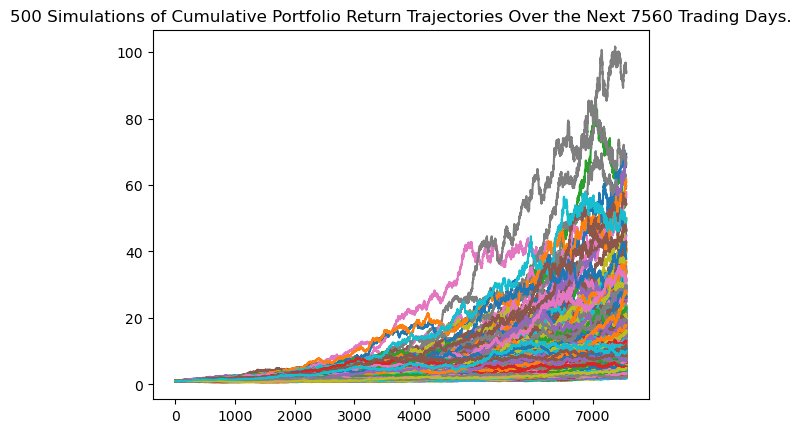

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
monte_thirty_years_plot = monte_thirty_years.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

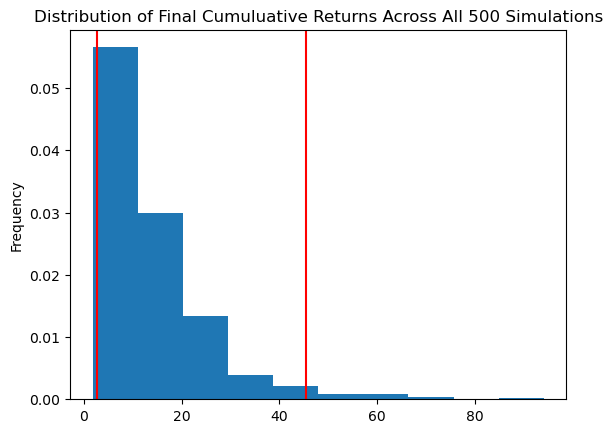

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc30_dist_plot = monte_thirty_years.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
stock_bond_three

SPY                                        
                               open    high     low     close     volume   
timestamp                                                                  
2017-08-07 04:00:00+00:00  247.4900  247.87  247.37  247.8400   31995021  \
2017-08-08 04:00:00+00:00  247.5100  248.91  246.83  247.2700   61719353   
2017-08-09 04:00:00+00:00  246.4700  247.31  246.06  247.2700   62632619   
2017-08-10 04:00:00+00:00  246.2900  246.44  243.70  243.7599  120418270   
2017-08-11 04:00:00+00:00  244.0200  244.80  243.75  244.1100   74869947   
...                             ...     ...     ...       ...        ...   
2020-08-03 04:00:00+00:00  328.3200  329.62  327.73  328.6700   53078112   
2020-08-04 04:00:00+00:00  327.8600  330.06  327.86  330.0000   41917896   
2020-08-05 04:00:00+00:00  331.4700  332.39  331.18  332.0300   42870955   
2020-08-06 04:00:00+00:00  331.4799  334.46  331.13  334.3200   43679448   
2020-08-07 04:00:00+00:00  333.2800  334.88  332.30  334.5700   57282821   

                                                      AGG                     
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.72  109.6066  \
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.69  109.5000   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.87  109.6600   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.85  109.6700   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.94  109.6800   
...                               ...         ...     ...     ...       ...   
2020-08-03 04:00:00+00:00      288003  328.658795  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250899  329.057592  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290036  332.939600  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                      
                             close    volume trade_count        vwap  
timestamp                                                             
2017-08-07 04:00:00+00:00  109.685   2359826        7755  109.674876  
2017-08-08 04:00:00+00:00  109.580   2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.670   2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.800   2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.870   1913253       10113  109.860974  
...                            ...       ...         ...         ...  
2020-08-03 04:00:00+00:00  119.400  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.630  10935154       39113  119.541666  
2020-08-05 04:00:00+00:00  119.400  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.570   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.430   5559066       15246  119.475306  

[757 rows x 14 columns]

In [36]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
mc30_sum_stats = monte_thirty_years.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
mc30_sum_stats

count           500.000000
mean             14.042143
std              11.433946
min               1.796705
25%               6.502745
50%              10.738168
75%              17.580965
max              94.103565
95% CI Lower      2.694426
95% CI Upper     45.499841
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [37]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the member's portfolio is ${total_stocks_bonds}")


The current balance of the member's portfolio is $60688


In [38]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc30_sum_stats[8]*total_stocks_bonds
ci_upper_thirty_cumulative_return = mc30_sum_stats[9]*total_stocks_bonds

# Print the result of your calculations
print(f"Based on the calculations, after 30 years your ${total_stocks_bonds} has a 95% chance to be somewhere between ${ci_lower_thirty_cumulative_return:.02f} and ${ci_upper_thirty_cumulative_return:.02f}")


Based on the calculations, after 30 years your $60688 has a 95% chance to be somewhere between $163519.31 and $2761294.35


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [39]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
monte_ten_years = MCSimulation(
    portfolio_data = stock_bond_three,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

# Review the simulation input data
print(monte_ten_years.portfolio_data.head())


                              SPY                                        
                             open    high     low     close     volume   
timestamp                                                                
2017-08-07 04:00:00+00:00  247.49  247.87  247.37  247.8400   31995021  \
2017-08-08 04:00:00+00:00  247.51  248.91  246.83  247.2700   61719353   
2017-08-09 04:00:00+00:00  246.47  247.31  246.06  247.2700   62632619   
2017-08-10 04:00:00+00:00  246.29  246.44  243.70  243.7599  120418270   
2017-08-11 04:00:00+00:00  244.02  244.80  243.75  244.1100   74869947   

                                                                   AGG   
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69  \
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002300  109.67   
2017-08-09 04:00:00+00:00      223650

In [40]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
monte_ten_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 110.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 120.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 130.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 140.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 150.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 160.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 170.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 180.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 190.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 200.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 210.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 220.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 230.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 240.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 250.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 260.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 270.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 280.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 290.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 300.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 310.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 320.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 330.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 340.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 350.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 360.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 370.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 380.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 390.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 400.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 410.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 420.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 430.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 440.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 450.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 460.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 470.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 480.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 490.


C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\HaeVo\OneDrive\Desktop\Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000500,1.002539,0.995657,0.996626,0.997561,1.003226,1.002027,0.999651,1.004421,1.004237,...,1.004939,0.999299,0.999971,0.992230,0.997198,0.998183,1.002273,0.991467,1.004166,1.002671
2,1.000265,0.996962,1.000371,0.994573,0.997352,0.999691,1.004011,0.997606,1.003325,1.002963,...,1.006294,1.000620,1.004705,0.986416,0.994305,1.001224,0.999643,0.989461,1.001501,1.004364
3,0.995593,0.997952,1.002880,0.994167,1.000306,1.003022,1.008359,1.001234,1.008258,1.002586,...,1.009469,1.001537,1.007361,0.989351,1.000857,1.001005,0.990863,0.998058,1.007237,1.009633
4,0.995310,1.000120,1.005366,0.988772,1.000579,1.003177,1.007891,1.005543,1.014001,1.003598,...,1.006906,1.002454,1.006434,0.983395,1.000661,0.997844,0.993139,0.992437,1.002179,1.012533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.253652,1.542086,1.340173,1.643436,1.350021,1.695254,1.908126,1.700494,1.470908,2.025362,...,1.483159,2.222912,1.849885,1.327870,1.227111,1.230605,2.005954,1.496078,1.499465,1.287116
2517,1.250240,1.540831,1.336788,1.644782,1.345534,1.691196,1.897427,1.704307,1.465064,2.027168,...,1.483312,2.229147,1.855280,1.331845,1.231506,1.231354,2.006457,1.503559,1.497034,1.284819
2518,1.247470,1.543153,1.342080,1.650654,1.354260,1.700247,1.908383,1.712457,1.466359,2.035257,...,1.473176,2.225576,1.857122,1.327588,1.232041,1.234296,2.008460,1.502708,1.501038,1.296626
2519,1.242655,1.535024,1.338541,1.655004,1.352871,1.703303,1.905105,1.702685,1.466900,2.038470,...,1.477782,2.226894,1.860054,1.320911,1.238382,1.237967,2.012507,1.491518,1.507250,1.299412


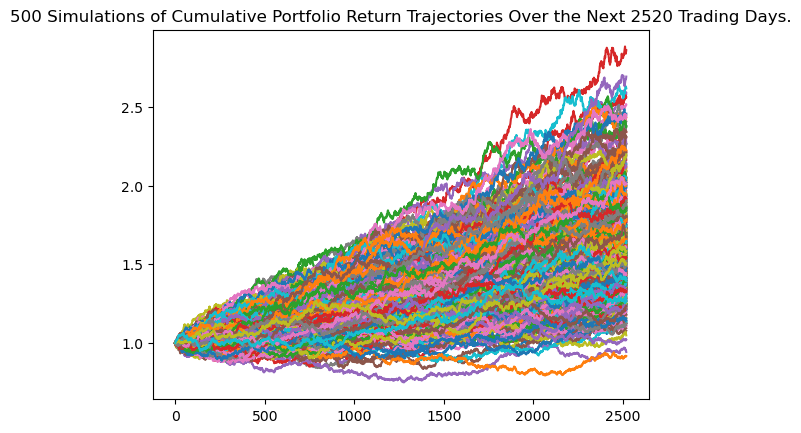

In [41]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
monte_ten_years_plot = monte_ten_years.plot_simulation()


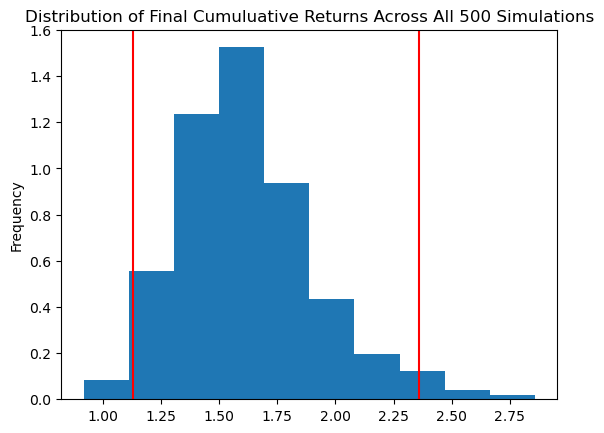

In [42]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mc10_dist_plot = monte_ten_years.plot_distribution()


In [43]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
mc10_sum_stats = monte_ten_years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
mc10_sum_stats

count           500.000000
mean              1.620736
std               0.300493
min               0.917338
25%               1.399843
50%               1.599191
75%               1.789835
max               2.858137
95% CI Lower      1.128969
95% CI Upper      2.357331
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [44]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the member's portfolio is ${total_stocks_bonds}")


The current balance of the member's portfolio is $60688


In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc10_sum_stats[8]*total_stocks_bonds
ci_upper_ten_cumulative_return = mc10_sum_stats[8]*total_stocks_bonds

# Print the result of your calculations
print(f"Based on the calculations, after 10 years your ${total_stocks_bonds} has a 95% chance to be somewhere between ${ci_lower_thirty_cumulative_return:.02f} and ${ci_upper_thirty_cumulative_return:.02f}")


Based on the calculations, after 10 years your $60688 has a 95% chance to be somewhere between $163519.31 and $2761294.35


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [46]:
yes, the amount gained in 30 years is the exact same as it would be when the stocks are more heavily weighed in 10 years.

SyntaxError: invalid syntax (488156976.py, line 1)